<a href="https://colab.research.google.com/github/tanuku-srivalli/Mall-Customer-Segmentation/blob/main/AIML_TASK_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Load the dataset (replace 'Mall_Customers.csv' with your actual file name if different)
try:
    df = pd.read_csv('Mall_Customers.csv')
except FileNotFoundError:
    print("Error: Make sure 'Mall_Customers.csv' is in the current directory.")
    # Create a small dummy DataFrame for demonstration if the file is not found
    data = {'Annual Income (k$)': [15, 17, 19, 21, 23, 70, 71, 72, 73, 74, 137, 139, 141, 143, 145],
            'Spending Score (1-100)': [39, 81, 6, 77, 40, 6, 95, 71, 75, 43, 16, 91, 39, 7, 7]}
    df = pd.DataFrame(data)

# Select the two columns for clustering as seen in your image
# We are creating a matrix 'X' with just these two features
X = df.iloc[:, [3, 4]].values # Selects 'Annual Income (k$)' (index 3) and 'Spending Score (1-100)' (index 4)

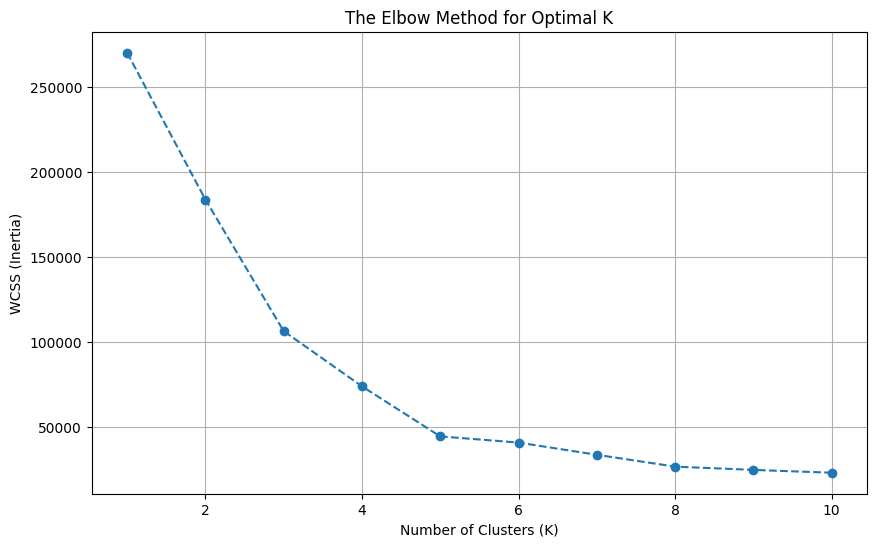


Optimal number of clusters (K) suggested by the Elbow Method: 5


In [2]:
# List to store WCSS values
wcss = []

# Test K values from 1 to 10
for i in range(1, 11):
    # n_init='auto' is a modern way to set n_init for better results
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(X)
    # The inertia_ attribute is the WCSS
    wcss.append(kmeans.inertia_)

# Plot the WCSS values to find the "elbow"
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

# Typically, the elbow for this dataset is found at K=5
optimal_k = 5
print(f"\nOptimal number of clusters (K) suggested by the Elbow Method: {optimal_k}")

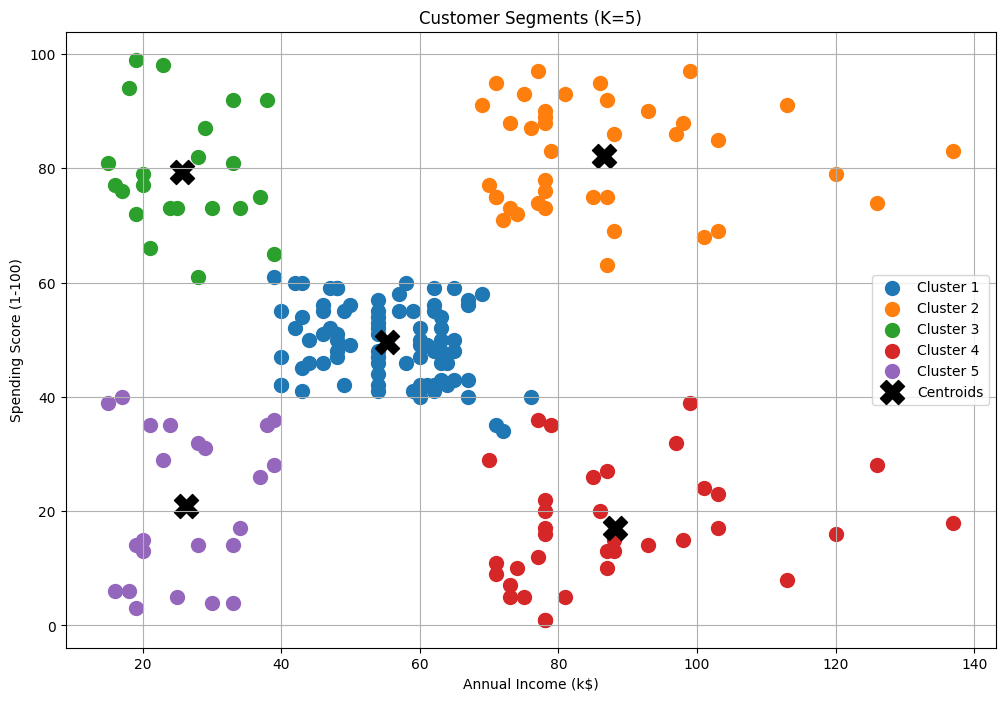


First 5 rows with new Cluster Labels:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


In [4]:
# Create the final K-Means model with the optimal K
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init='auto')

# Predict the cluster for each customer
y_kmeans = kmeans.fit_predict(X)

# The coordinates of the cluster centers (centroids)
centroids = kmeans.cluster_centers_

# Visualize the Clusters
plt.figure(figsize=(12, 8))

# Loop through each cluster (0 to K-1) to plot the points in that cluster
for i in range(optimal_k):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1],
                s=100, label=f'Cluster {i+1}')

# Plot the Centroids
plt.scatter(centroids[:, 0], centroids[:, 1],
            s=300, c='black', marker='X', label='Centroids')

plt.title(f'Customer Segments (K={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

# The cluster labels back to the original DataFrame
df['Cluster'] = y_kmeans
print("\nFirst 5 rows with new Cluster Labels:")
print(df.head())